In [6]:
# Este notebook tem caráter de estudo. Não é pretendido, portanto, inferir qualquer resultado ou insight verossimilhante.
# Será aplicado, tecnicas de manipulação numérica com numpy, um pseudo-tratamento, visualização e elaboração de algo que se assemelha com uma reta de minimos
# quadrados a respeito dos indices de felicidade mundial, mas especificamente: como a felicidade evolui ao longo de alguns outros parametros!

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chardet

In [8]:
url_happiness_rate = r'/content/World-happiness-report-2024.csv'
url_time_evaluate = r'/content/World-happiness-report-updated_2024.csv'

In [9]:
happiness_rate_data = pd.read_csv(url_happiness_rate)

# Do dataframe happiness_rate_data, separamos os 10 primeiros e os 10 ultimos para a nossa análise.

ten_higher = pd.DataFrame(happiness_rate_data.head(10)).reset_index()
ten_higher.drop('index', axis=1, inplace=True)

ten_lowest = pd.DataFrame(happiness_rate_data.tail(10).sort_values(by='Ladder score', ascending=False)).reset_index()
ten_lowest.drop('index', axis=1, inplace=True)

ten_higher


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


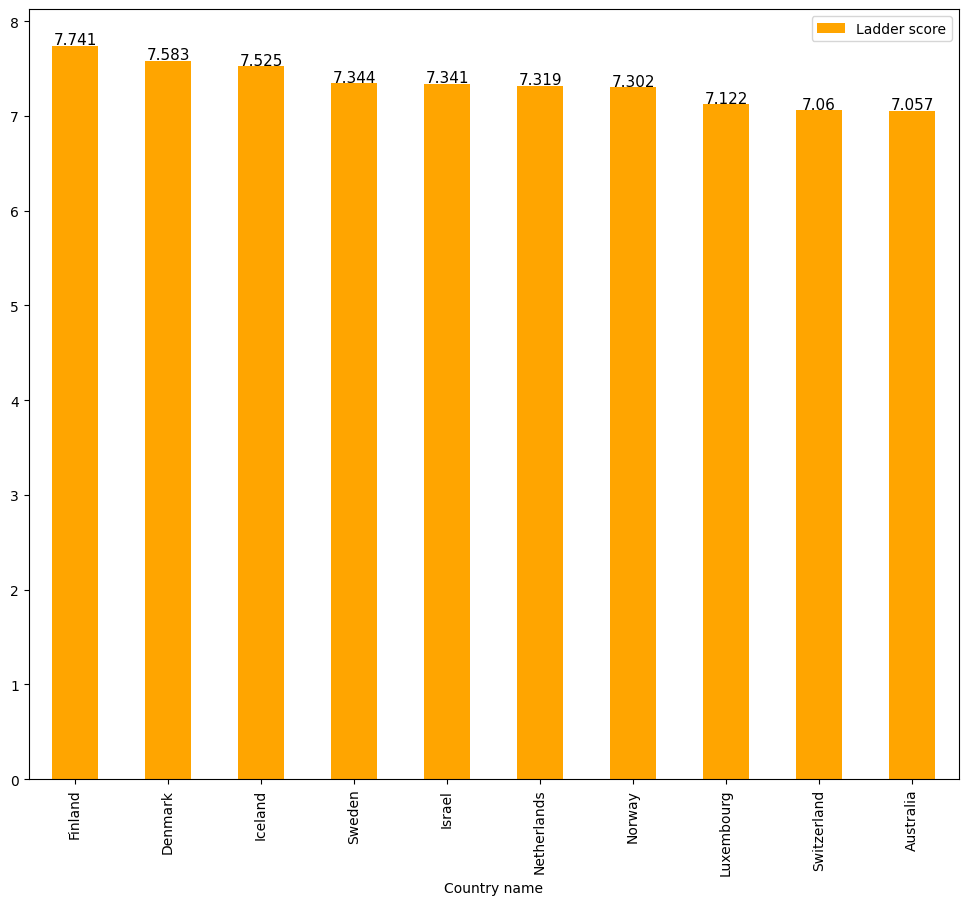

In [10]:
ten_higher_plot = ten_higher.plot(kind='bar', x='Country name', y='Ladder score', figsize=(12,10), color='orange')

for i in ten_higher_plot.patches:
  ten_higher_plot.annotate(
      i.get_height(),
      (i.get_x() + i.get_width() / 2, i.get_height()),
      ha='center', va='baseline',
      xytext=(0,1), textcoords= 'offset points',
      color='black', fontsize=11
  )

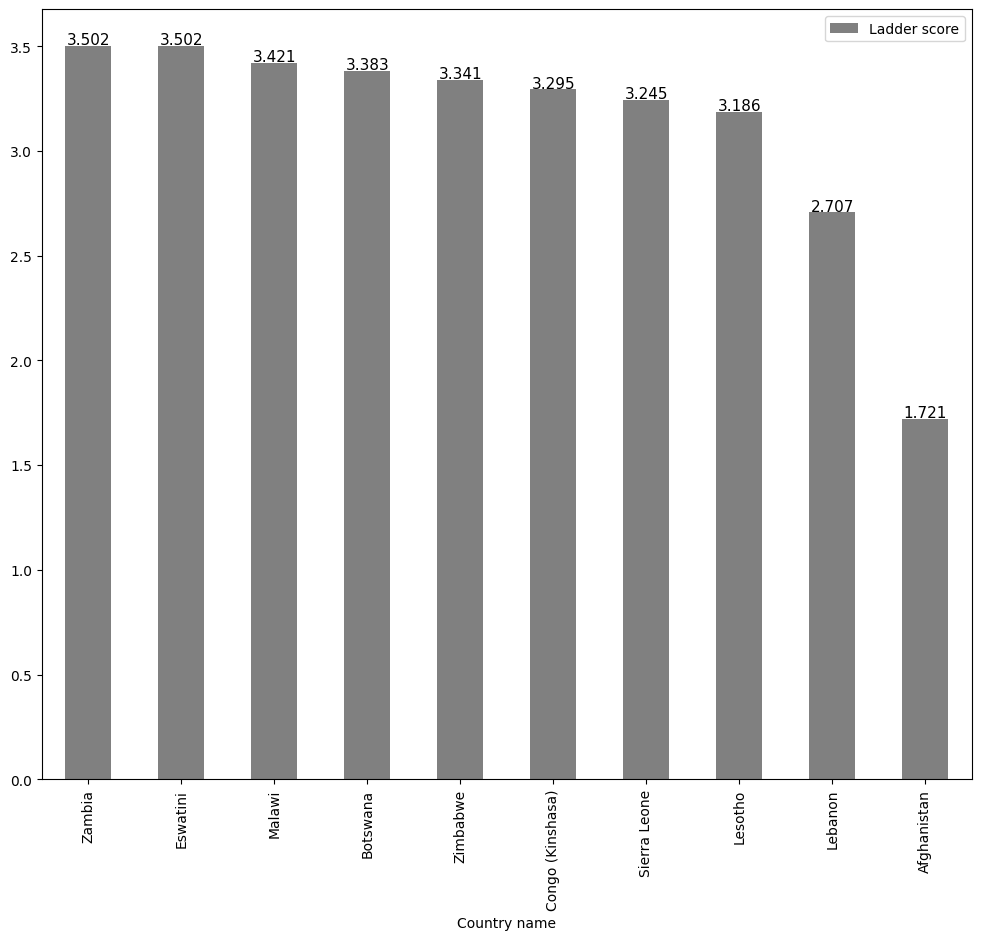

In [11]:
ten_lowest_plot = ten_lowest.plot(kind='bar', x='Country name', y='Ladder score', figsize=(12,10), color='grey')

for i in ten_lowest_plot.patches:
  ten_lowest_plot.annotate(
      i.get_height(),
      (i.get_x() + i.get_width() / 2, i.get_height()),
      ha='center', va='baseline',
      xytext=(0,1), textcoords= 'offset points',
      color='black', fontsize=11
  )

In [12]:
# ANÁLISE DOS GRÁFICOS:
# I. Predominância de países do suldoeste europeu entre os 10 mais felizes. Incluse, desses, apenas 2 fogem desse padrão: Israel e Australia
# II. Predominãncia de países da áfrica subsariana e alguns países sul asiaticos como libano e afeganistão.

# PARA A OBSERVAÇÃO DE PARAMETROS AO LONGO DO TEMPO, VAMOS SEPARAR OS 5 PAÍSES MAIS FELIZES E OS 5 MENOS.

th_to_temporal_analysis = [i for i in ten_higher.sort_values('Ladder score', ascending=False).head(5)['Country name']]
tl_to_temporal_analysis = [i for i in ten_lowest.sort_values('Ladder score').head(5)['Country name']]

th_to_temporal_analysis

['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel']

In [13]:
# Existe a possibilidade de carregar os dados diretamente com o numpy, a partir de loadtxt ou genfromtxt
# inclusive, a segunda escolha é melhor visto que não temos certeza da formatação dos dados. Para evitar
# erros em datasets cuja verificação não pode ser feita manualmente devido ao tamanho, genfromtxt é mais
# viável devido a funções como filling_values, skip_header, etc.
# Apesar disso, para filtramos os dados a partir do nome dos países carregaremos os dados com pandas,
# visto que os arrays tem tipo pre-definido e não poderiamos misturar Country name com as outras estatísticas
# float64.

In [14]:
# o encoding foi definido com auxilio de ia generativa. apesar disso, a biblioteca chardet poderia fazer
# esse trabalho lendo todo o csv e definindo com, chardet.detect (apesar que de forma menos otimizada).

time_evaluate_data = pd.read_csv(url_time_evaluate, encoding='iso-8859-1')
time_evaluate_data.replace('', np.nan, inplace=True)
time_evaluate_data


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [15]:
newh_time_evaluate_data = time_evaluate_data[time_evaluate_data['Country name'].isin(th_to_temporal_analysis)]

In [16]:
newl_time_evaluate_data = time_evaluate_data[time_evaluate_data['Country name'].isin(tl_to_temporal_analysis)]

# existem bem menos dados, eram para ser 90 dados se houvesse a evolução contínua de 2005 até 2023.

In [37]:
finland_data = newh_time_evaluate_data[newh_time_evaluate_data['Country name'] == 'Finland'].copy(deep=True)
finland_data.drop('Country name', axis=1, inplace=True)

In [38]:
afghanistan_data = newh_time_evaluate_data[newh_time_evaluate_data['Country name'] == 'Afghanistan'].copy(deep=True)
afghanistan_data.drop('Country name', axis=1, inplace=True)

In [27]:
params = finland_data.columns

finland_data.to_csv('/content/finland_data', sep=',', index=False)
finland_array = np.loadtxt('/content/finland_data', delimiter=',', skiprows=1)


In [20]:
# theme - column
# -------------------------------------
# Log GDP per capita - 2
# Social support - 3
# Healthy life expectancy at birth - 4
# Perceptions of corruption - 7

In [32]:
finland_log_gdp_per_capita = finland_array[:,2]
finland_social_support = finland_array[:,3]
finland_healthy_life_expectancy_at_birth = finland_array[:,4]
finland_perceptions_of_corruption = finland_array[:,7]

In [22]:
# X : FIXO = TEMPO

In [29]:
# USAREI INTERPOLAÇÃO LINEAR PARA DETERMINAR OS ANOS DE 2007 E 2009.
finland_2007 = np.mean(finland_array[0:2,:],axis=0)
finland_2009 = np.mean(finland_array[1:3,:],axis=0)

finland_array = np.vstack((finland_array, finland_2007))
finland_array = np.vstack((finland_array, finland_2009))



In [30]:
np.argsort(finland_array[:,0])
finland_array = finland_array[np.argsort(finland_array[:,0])]


In [42]:
finland_array


X = finland_array[:,0]
Y = finland_healthy_life_expectancy_at_birth

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.7978774085867766


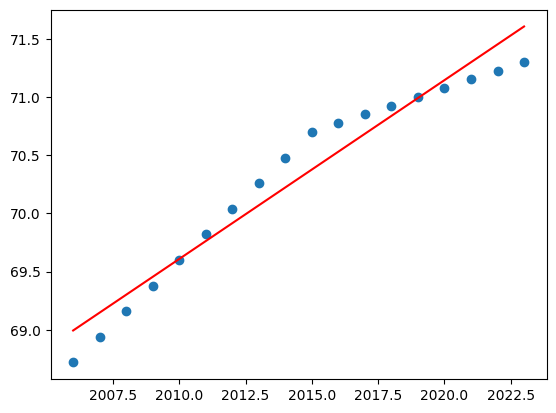

In [43]:
# RETA DE TENDÊNCIA DA TAXA DE EXPECTATIVA DE VIDA AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.scatter(X,Y)
plt.plot(X,y, color='red')
print(np.linalg.norm(Y-y))

In [54]:
X = finland_array[:,0]
Y = finland_log_gdp_per_capita

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.11349683768168412


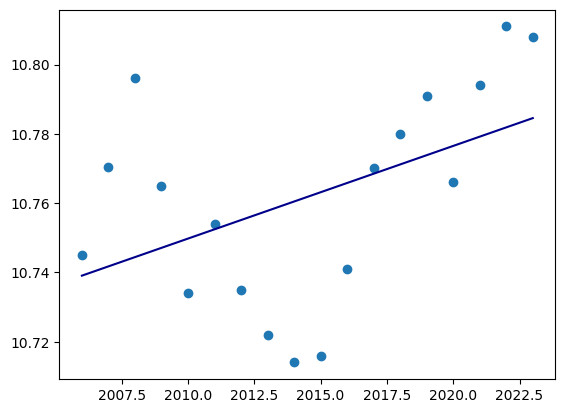

In [56]:
# RETA DE TENDÊNCIA DO pib per capta adaptado para o poder de compra em formato logaritimico AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.scatter(X,Y)
plt.plot(X,y, color='darkblue')
print(np.linalg.norm(Y-y))

In [49]:
X = finland_array[:,0]
Y = finland_social_support

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.050650063816033625


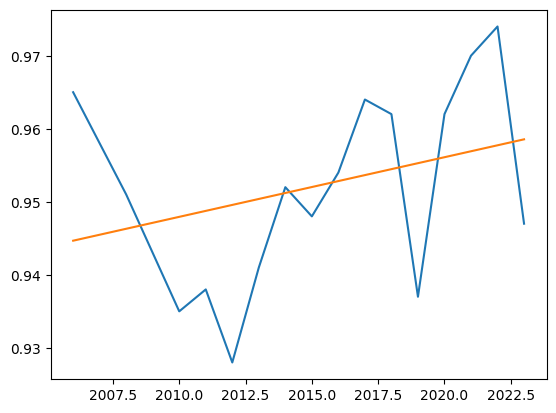

In [50]:
# RETA DE TENDÊNCIA DA AJUDA SOCIAL - PROVENIENTE DO GOVERNO - AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.plot(X,Y)
plt.plot(X,y)
print(np.linalg.norm(Y-y))

In [57]:
X = finland_array[:,0]
Y = finland_perceptions_of_corruption

n = 18

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X)**2))
b = np.mean(Y) - a*np.mean(X)

y = a*X + b

0.294186532421648


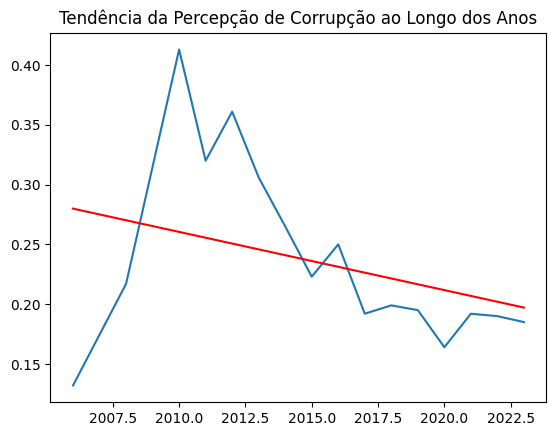

In [70]:
# RETA DE TENDÊNCIA DA PERCEPÇÃO DE CORRUPÇÃO POR PARTE DA POPULAÇÃO AO LONGO DOS ANOS DO PAÍS MAIS FELIZ DO MUNDO

plt.plot(X,Y)
plt.title('Tendência da Percepção de Corrupção ao Longo dos Anos', loc='center')
plt.plot(X,y, color='red')
print(np.linalg.norm(Y-y))